<a href="https://colab.research.google.com/github/yukteyoul/Statisical_Physics/blob/main/Ising_model_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
상전이

# Ising model

i, j 축의 2차원 상자 안에 point 존재. up/down 으로 spin 존재
아래 식으로 모두 더해 E 구하기

S_ij = 1 or -1

E = -Sigma(S_ij * S_i'j')

<E> 계산 >> 온도 T에 대한 함수
'''


"\n상전이\n\n# Ising model\n\ni, j 축의 2차원 상자 안에 point 존재. up/down 으로 spin 존재\n아래 식으로 모두 더해 E 구하기\n\nS_ij = 1 or -1\n\nE = -Sigma(S_ij * S_i'j')\n\n<E> 계산 >> 온도 T에 대한 함수\n"

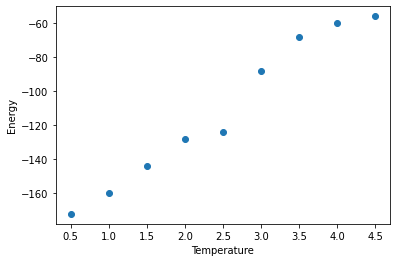

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Spin state in 2D lattice structure
def State(N):
    state = 2 * np.random.randint(2, size=(N+1, N+1)) - 1
    state[N, :], state[:, N] = 0, 0
    return state

# Energy Calculation in lattice
def Energy(state, N):
    E_tot = 0
    for i in range(N):
        for j in range(N):
            S = state[i, j]
            S_mul = state[(i+1) %N, j] + state[i, (j+1) %N]
            E_tot += -S * S_mul
    return E_tot

# Metropolis Monte Carlo Algorithm
def MMC(state, beta, N):
    E_1 = Energy(state, N)
        
    x = np.random.randint(0, N)
    y = np.random.randint(0, N)
    state[x, y] *= -1     # 스핀상태 뒤집기

    E_2 = Energy(state, N)
    dE = E_2 - E_1

    if dE > 0:
        R = np.random.rand()
        P = np.exp(-beta * dE)

        if R > P:
            state[x, y] *= -1       # dE > 0인 경우에서 0 < random number < P이면 다시 뒤집히지 않은 상태로 바꿈 / random number > P이면 다시 뒤집음
                
    return state

# Partition function
def PartitionFunc(state ,beta):
    part = 0
    for i in range(N):
        for j in range(N):
            part += np.exp(-Energy(state, N) * beta)
    return part

# Mean Energy
def Mean_E(state, beta):
    meanE = 0
    for i in range(N):
        for j in range(N):
            meanE += Energy(state, N) * np.exp(-beta * Energy(state, N))
    meanE /= PartitionFunc(state, beta)
    return meanE

# parameter
N = 10            # lattice 크기, N * N
kT_max = 5        # kT의 maximum 값
n = 10            # kT_max를 분할할 수
step = 1000       # 그 온도에서 평형상태로 만들기 위한 MMC step 수
kT_x = []         # 그래프 x축, kT
E_y = []          # 그래프 y축, <E>

# Main process
for i in range(1, n):
    state = State(N)          # lattice 배열 생성
    temp = (i/n) * kT_max
    beta = 1/temp

    for s in range(step):
        MMC(state, beta, N)
        mean_E = Mean_E(state, beta)

    kT_x.append(temp)
    E_y.append(mean_E)

plt.scatter(kT_x, E_y)
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.show()
